In [1]:
%matplotlib inline
import importlib as imp
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('ticks');
current_colors = sns.color_palette()
sns.set_palette('Accent');

# Adjust all text and axes colors to black. default is some studip gray that appears to faint when printed 
from matplotlib import rc , rcParams
rc('axes',edgecolor='black')
rc('xtick',color='black',labelsize=15)
rc('ytick',color='black',labelsize=15)
rc('text',color='black')
rc('axes',labelcolor='black',linewidth=2.0)
rc('font',size=15)
#rcParams["patch.force_edgecolor"] = True

import Calculate_ABA_Finkelsteinlab_Diewertje as CalcABA
imp.reload(CalcABA);
import plotting_ABA_Diewertje as pltABA
imp.reload(pltABA);
import plotting_Boyle_Diewertje as plt_B
imp.reload(plt_B);

import sys 
sys.path.append('../code_general/')
import CRISPR_free_energy_landscape_Diewertje as FreeEnergy
imp.reload(FreeEnergy);
import read_model_ID;
imp.reload(read_model_ID);

import sys 
sys.path.append('../code_general_Finkelsteinlab/')
import plotting_Finkelsteinlab as plt_F
imp.reload(plt_F)


import analysis_SA_fits_Diewertje as SAfits
imp.reload(SAfits);



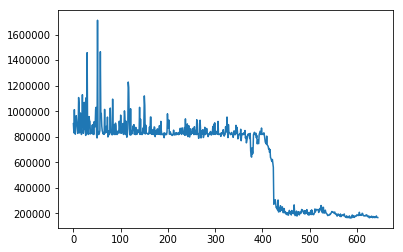

In [31]:
# to see progress in chi squared while the program is still running, we see that the chi-squared indeeds lowers after a lot of iterations
import numpy as np
import pandas as pd
import pylab as plt

f=open('../Diewertje/8_4_2019_conc2/fit_8_4_2019_conc2_sim_1.txt')
lines=f.read().splitlines()
all_line=lines[1:]
Params=[]
for i in range(len(all_line)):
    line=all_line[i][:-1].split()
    Params.append(list(map(float,line[:-1])))
#print(Params)
df=pd.DataFrame(Params)
df
plt.plot(range(len(df[44])),df[44])

# Get best fit for 2 concentration points

In [24]:
simset2 = []
no_good = []
# Used concentrations: [10,100]
chi_squared = [] 

#---------- collect simulations ---------------
for sim in range(1,6):
    sa = pd.read_csv('../Diewertje/8_4_2019_conc2/fit_8_4_2019_conc2_sim_' +str(sim)+'.txt', delimiter='\t', index_col=46)
    filename = '../Diewertje/8_4_2019_conc2/fit_8_4_2019_conc2_sim_' +str(sim) +'.txt'   
    chi_squared.append(sa.Potential.iloc[-1])
    simset2.append(filename)
        
    
best_fit_conc2 = simset2[np.argmin(chi_squared)]
best_fit_conc2

'../Diewertje/8_4_2019_conc2/fit_8_4_2019_conc2_sim_4.txt'

In [2]:
# Load data
import Prepare_data_Simple as Pre
rawABA=pd.read_csv('../Data_ABA_Finkelsteinlab/TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv')
rawABA

# prepare data
import Prepare_data_Simple as pre
xdata,ydata,yerr=pre.Prepare_Cdata('../Data_ABA_Finkelsteinlab/','TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv')


In [4]:
# Load Parameters to calculate the chi-squared for best fit
import get_parameters_fit_Diewertje as getParm
Nparams=44
concentrations=np.array([10,100])
Param_conc2=getParm.load_simm_anneal(best_fit_conc2,Nparams)
import Chisq_Finkelstein as chin
chi_normal=[]
for i in range(0,len(xdata)):
    chi_normal.append(chin.calc_Chi_square(Param_conc2,xdata[i],ydata[i],yerr[i],
                                concentrations, reference=1, 
                                ontarget_ABA=42,guide_length=20,
                                model_id='init_limit_general_energies_v2'))
#chi_normal


ontarget ABA is: 2.602733089529497
[ 2.22268334e+00  1.68590037e+00  2.17535232e+00  2.24281982e+00
  2.10125579e+00  2.20265945e+00  2.11271174e+00  1.56577049e+00
  2.07871370e+00  1.52629757e+00  1.15969364e+00  6.82936138e-01
  5.19368595e-01  5.93687475e-01  4.58773434e-01  1.14702127e-05
  1.36498952e-05 -8.10940254e-05  4.01340525e-08 -8.75981578e-06]


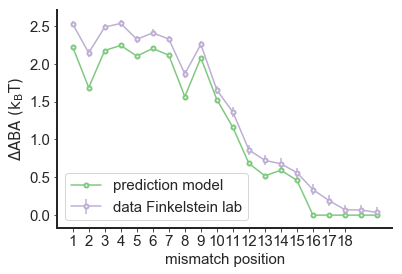

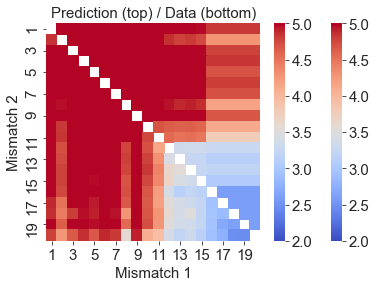

In [5]:
import plotting_simple_fit as pltS
T=60*10
guide_length=20
model_id = 'init_limit_general_energies_v2'

plt.figure()
_ = pltS.predict_single_mm(Param_conc2,model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)
plt.figure()
_ = pltABA.predict_double_mm(Param_conc2,model_id,T, guide_length, show_plot=True, show_data=True, data_file=rawABA)

# Cannot do those plots, because do not have block data
# plt.figure()
# _ = pltABA.predict_1D_mmblocks(Param_normal, model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)
# plt.figure()
# _ = pltABA.predict_block_mismatches(Param_normal, model_id, T,guide_length, show_plot=True, show_data=True, data_file=rawABA)



C:\Users\Diewertje\Python\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Diewertje\Python\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


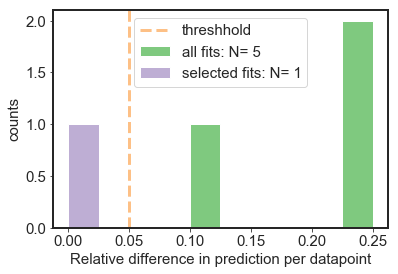

In [7]:
# This does exactly the same as above! To get scores
selected_sims, selected_scores, scores = SAfits.select_on_prediction(simset2, 
                                                         chi_squared, 
                                                         percentage=0.05,
                                                         Nparams=44,
                                                         model_id='init_limit_general_energies_v2',
                                                         precalculated=False, 
                                                         score=None,
                                                         save_scores=False, 
                                                         filename='../data/25_10_2018/select_with_predcitions.txt'
                                                         ) # do not use filename now
plt.hist(scores, normed=False, bins=np.arange(0,max(scores),0.025), label='all fits: N= ' +str(len(scores)))
plt.hist(selected_scores,normed=False, bins=np.arange(0,max(scores),0.025), label='selected fits: N= ' +str(len(selected_scores)));

plt.axvline(0.05, linestyle='dashed', linewidth=3, color=sns.color_palette()[2], label='threshhold')


plt.legend(fontsize=15);
plt.xlabel('Relative difference in prediction per datapoint', fontsize=15);
plt.ylabel('counts', fontsize=15);
plt.xticks(fontsize=15);

plt.yticks(fontsize=15);

# WHY SHOULD NORMED BE ON????

In [28]:
# --- make selection --- 
#simset = selected_sims 

# --- store resulting fit parameters in a set of Dataframes --- 
matches, mismatches, rates, landscape, free_energy, fast_Rloop = SAfits.process_SA_fits(simset2)
forward_rates = rates[['sol_to_PAM','PAM_to_R1','internal']]
matches.loc[best_fit_conc2]


PAM    3.500000
1     -9.291593
2      1.270061
3      0.664182
4     -1.592957
5      4.862708
6      1.591528
7     -4.688122
8      2.801393
9      3.711637
10    -5.383268
11     7.745923
12    -1.735364
13    -5.087049
14     3.169032
15     5.973671
16    -9.885007
17     1.857118
18    -8.912564
19    -4.331315
20     7.361305
Name: ../Diewertje/8_4_2019_conc2/fit_8_4_2019_conc2_sim_4.txt, dtype: float64

C:\Users\Diewertje\Python\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


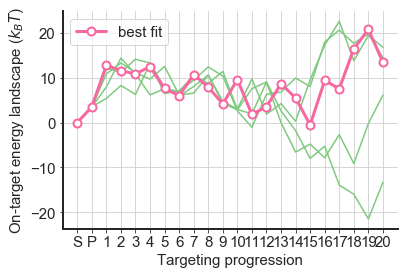

In [26]:
# --- (microscopic) free-energy landscape --- 
plt.figure()
Nparams=44
for filename in simset2:
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    parameters[0]=3.5 # if want to fix epsilon PAM
    Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(parameters,model_id,show_plot=False);
    plt.plot(np.array(Energy_landscape),color=sns.color_palette()[0])
lowest_chi_squared = np.array( landscape.loc[best_fit_conc2] )


plt.plot(np.array(lowest_chi_squared), color='#f768a1' , 
         marker='o', 
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='best fit');

LandscapeMED = landscape[landscape.columns[:]].median()
# plt.plot(np.array(LandscapeMED),color='black' , 
#          marker='o',
#          lw=3,
#          markersize =8,
#          markerfacecolor='white',
#          markeredgewidth= 2,
#          label='median');

plt.legend(fontsize=15,frameon=True)
plt.xlim(-1,22)
plt.xticks(list(range(0,22)),['S','P']+list(LandscapeMED.index[2:]),  fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Targeting progression',fontsize=15)
plt.ylabel('On-target energy landscape ($k_BT$)',fontsize=15)
plt.grid('on')
sns.despine();


In [29]:
matches

,PAM,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
sim,,,,,,,,,,,,,,,,,,,,,
../Diewertje/8_4_2019_conc2/fit_8_4_2019_conc2_sim_1.txt,3.5,-1.876060,-2.883008,2.001907,-6.929696,6.712153,-0.573651,-3.347533,1.689743,-2.683489,...,0.986121,-7.100009,9.053609,6.557452,-1.779202,3.060766,-5.179977,6.447199,-8.923456,-6.326502
../Diewertje/8_4_2019_conc2/fit_8_4_2019_conc2_sim_2.txt,3.5,-8.620290,0.958339,-2.946232,0.845486,5.457600,1.916853,-2.143781,-2.547267,6.255332,...,-4.719000,-1.488405,6.434516,4.416439,6.175717,-2.720458,8.662726,2.037651,5.495937,-8.184033
../Diewertje/8_4_2019_conc2/fit_8_4_2019_conc2_sim_3.txt,3.5,-4.424065,-6.444851,3.565294,4.631473,-1.345783,0.574283,-2.510558,-2.936693,2.024976,...,3.635124,-7.340122,-0.512524,-3.105225,1.890655,-9.917316,-2.668456,2.968644,-2.113995,5.313640
../Diewertje/8_4_2019_conc2/fit_8_4_2019_conc2_sim_4.txt,3.5,-9.291593,1.270061,0.664182,-1.592957,4.862708,1.591528,-4.688122,2.801393,3.711637,...,7.745923,-1.735364,-5.087049,3.169032,5.973671,-9.885007,1.857118,-8.912564,-4.331315,7.361305
../Diewertje/8_4_2019_conc2/fit_8_4_2019_conc2_sim_5.txt,3.5,-7.330622,-2.454330,2.146976,1.461159,-2.831264,6.366145,-0.418802,-4.012253,5.851554,...,-6.691187,7.860135,-2.370696,3.938359,-9.255328,-7.715737,-5.307682,8.801864,-5.638261,2.625010


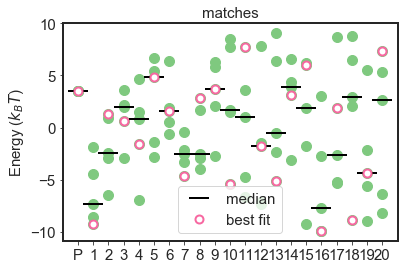

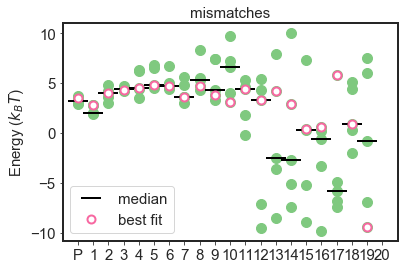

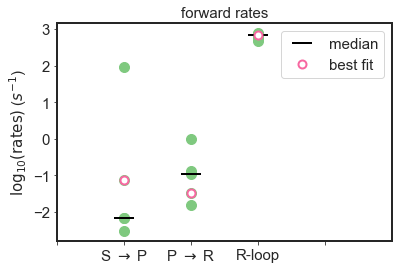

In [30]:
# ---- show fluctuations in parameter sets --- 
# THIS IS THE RESULT

# --- Matches ---
# MAYBE WE WANT TO NEGATE (multiply by -1 all the epsilonC to have the same sign convention as EpsilonPAM and EpsilonI)
plt.figure()
for sim in simset2:
    matches.loc[sim].plot(marker='o',markersize=10,linestyle='', color=sns.color_palette()[0], alpha=1.0,label='')

matches.median().plot(color='black',
            linestyle='',
             marker='_', 
             lw=4,
             markersize =20,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='median')    

matches.loc[best_fit_conc2].plot(color='#f768a1',
            linestyle='',
             marker='o', 
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='best fit')



plt.title('matches',fontsize=15)
plt.xticks(list(range(0,21)),['P']+list(range(1,21)),fontsize=15);
plt.xlim(-1,21);
plt.yticks(fontsize=15);
plt.ylabel('Energy ($k_BT$)',fontsize=15);
plt.legend(fontsize=15,frameon=True);

# --- Mismatches --- 
plt.figure()
for sim in simset2:
    mismatches.loc[sim].plot(marker='o',markersize=10,linestyle='', color=sns.color_palette()[0], alpha=1.0,label='')

mismatches.median().plot(color='black',
            linestyle='',
             marker='_', 
             lw=4,
             markersize =20,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='median')    
    

mismatches.loc[best_fit_conc2].plot(color='#f768a1',
            linestyle='',
             marker='o', 
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='best fit')



plt.title('mismatches',fontsize=15)
plt.xticks(list(range(0,21)),['P']+list(range(1,21)),fontsize=15);
plt.xlim(-1,21);
plt.yticks(fontsize=15);
plt.ylabel('Energy ($k_BT$)',fontsize=15);
plt.legend(fontsize=15,frameon=True);


# --- 10log of the forward rates --- 
plt.figure()
for sim in simset2:
    forward_rates.loc[sim].apply(np.log10).plot(marker='o',markersize=10,linestyle='', color=sns.color_palette()[0], alpha=1.0,label='')

forward_rates.median().apply(np.log10).plot(color='black',
            linestyle='',
             marker='_', 
             lw=4,
             markersize =20,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='median')    
    
    

forward_rates.loc[best_fit_conc2].apply(np.log10).plot(color='#f768a1',
            linestyle='',
             marker='o', 
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='best fit')



plt.title('forward rates',fontsize=15)
plt.xticks(range(-1,4),['',r'S $\rightarrow$ P',r'P $\rightarrow$ R','R-loop',''],fontsize=15);
plt.xlim(-1,4);
plt.yticks(fontsize=15);
plt.ylabel(r'$\log_{10}(\rm{rates})$ ($s^{-1}$)',fontsize=15);
plt.legend(fontsize=15,frameon=True);




# Best fit for 3 concnetration points

In [2]:
simset3 = []
no_good = []
# Used concentrations: [10,100]
chi_squared = [] 

#---------- collect simulations ---------------
for sim in range(1,11):
    sa = pd.read_csv('../Diewertje/8_4_2019_conc3/fit_8_4_2019_conc3_sim_' +str(sim)+'.txt', delimiter='\t', index_col=46)
    filename = '../Diewertje/8_4_2019_conc3/fit_8_4_2019_conc3_sim_' +str(sim) +'.txt'   
    chi_squared.append(sa.Potential.iloc[-1])
    simset3.append(filename)
        
    
best_fit_conc3 = simset3[np.argmin(chi_squared)]
best_fit_conc3

'../Diewertje/8_4_2019_conc3/fit_8_4_2019_conc3_sim_10.txt'

In [3]:
# Load data
import Prepare_data_Simple as Pre
rawABA=pd.read_csv('../Data_ABA_Finkelsteinlab/TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv')
rawABA

# prepare data
import Prepare_data_Simple as pre
xdata,ydata,yerr=pre.Prepare_Cdata('../Data_ABA_Finkelsteinlab/','TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv')


In [4]:
# Load Parameters to calculate the chi-squared for best fit
import get_parameters_fit_Diewertje as getParm
Nparams=44
concentrations=np.array([10,100])
Param_conc3=getParm.load_simm_anneal(best_fit_conc3,Nparams)
import Chisq_Finkelstein as chin
chi_normal=[]
for i in range(0,len(xdata)):
    chi_normal.append(chin.calc_Chi_square(Param_conc3,xdata[i],ydata[i],yerr[i],
                                concentrations, reference=1, 
                                ontarget_ABA=42,guide_length=20,
                                model_id='init_limit_general_energies_v2'))
#chi_normal


ontarget ABA is: 2.800807744951609
[ 2.31786846e+00  1.46085055e+00  1.97764022e+00  2.01903704e+00
  1.88447301e+00  1.99722922e+00  1.93191614e+00  1.30289876e+00
  1.82268188e+00  1.23090575e+00  9.40820062e-01  5.30728397e-01
  5.29986417e-01  3.93182640e-01  3.16711445e-01 -1.98397352e-04
 -1.45810801e-04  6.67961882e-02  1.30021039e-04 -7.64376542e-05]


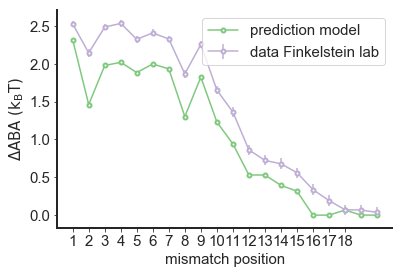

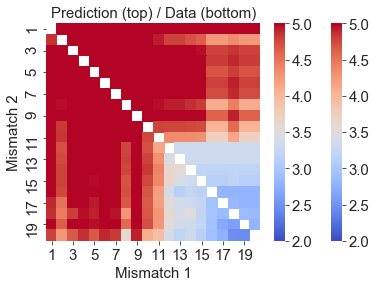

In [14]:
import plotting_simple_fit as pltS
T=60*10
guide_length=20
model_id = 'init_limit_general_energies_v2'

plt.figure()
_ = pltS.predict_single_mm(Param_conc3,model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)


plt.figure()
_ = pltABA.predict_double_mm(Param_conc3,model_id,T, guide_length, show_plot=True, show_data=True, data_file=rawABA)

# Cannot do those plots, because do not have block data
# plt.figure()
# _ = pltABA.predict_1D_mmblocks(Param_normal, model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)
# plt.figure()
# _ = pltABA.predict_block_mismatches(Param_normal, model_id, T,guide_length, show_plot=True, show_data=True, data_file=rawABA)



[ 1.31882561 -6.5880103   1.59239502  0.46021068 -2.49593644  0.09580053
  4.54430596 -3.37045113  0.37192334  1.02581499  4.12556609  1.64960851
 -0.03692466 -4.49653651  4.39600456 -3.57616013  3.90152848  3.48127153
 -4.66585257  1.77729046  8.90727104]
[ 3.6214107   6.5880103  -1.59239502 -0.46021068  2.49593644 -0.09580053
 -4.54430596  3.37045113 -0.37192334 -1.02581499 -4.12556609 -1.64960851
  0.03692466  4.49653651 -4.39600456  3.57616013 -3.90152848 -3.48127153
  4.66585257 -1.77729046 -8.90727104]
[ 5.11995713 -9.72069113  2.30495329 -0.29072649  1.96747591 -1.24916234
  1.68790939  2.7942864  -4.55276227  5.80075988  0.93396469  2.04693239
 -7.09014796  6.3513093  -6.43382126  0.79569238  7.9733008  -1.38269389
  7.47596858 -0.38883244 -5.1254008 ]
[ 5.11995713  9.72069113 -2.30495329  0.29072649 -1.96747591  1.24916234
 -1.68790939 -2.7942864   4.55276227 -5.80075988 -0.93396469 -2.04693239
  7.09014796 -6.3513093   6.43382126 -0.79569238 -7.9733008   1.38269389
 -7.475968

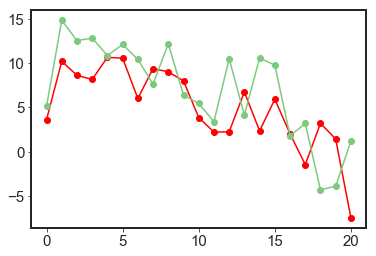

In [38]:
# to plot boyle in this graph
Param_Boyle=np.loadtxt('parameters_Boyle.txt')
epsC = Param_Boyle[:21].copy()
print(epsC)
epsC[0]+=np.log(10)
epsC[1:] *= -1
print(epsC)

epsC_fit=np.array(Param_conc3[:21]).copy()
print(epsC_fit)
epsC_fit[1:] *= -1
print(epsC_fit)

plt.plot(range(0,21),np.cumsum(epsC),marker='o',c='r')
plt.plot(range(0,21),np.cumsum(epsC_fit),marker='o')

In [34]:
epsC_fit=np.array([Param_conc3[:21]]).copy()
epsC_fit

array([[ 5.11995713, -9.72069113,  2.30495329, -0.29072649,  1.96747591,
        -1.24916234,  1.68790939,  2.7942864 , -4.55276227,  5.80075988,
         0.93396469,  2.04693239, -7.09014796,  6.3513093 , -6.43382126,
         0.79569238,  7.9733008 , -1.38269389,  7.47596858, -0.38883244,
        -5.1254008 ]])

C:\Users\Diewertje\Python\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Diewertje\Python\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


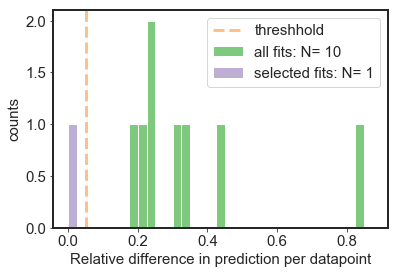

In [6]:
# This does exactly the same as above! To get scores
selected_sims, selected_scores, scores = SAfits.select_on_prediction(simset3, 
                                                         chi_squared, 
                                                         percentage=0.05,
                                                         Nparams=44,
                                                         model_id='init_limit_general_energies_v2',
                                                         precalculated=False, 
                                                         score=None,
                                                         save_scores=False, 
                                                         filename='../data/25_10_2018/select_with_predcitions.txt'
                                                         ) # do not use filename now
plt.hist(scores, normed=False, bins=np.arange(0,max(scores),0.025), label='all fits: N= ' +str(len(scores)))
plt.hist(selected_scores,normed=False, bins=np.arange(0,max(scores),0.025), label='selected fits: N= ' +str(len(selected_scores)));

plt.axvline(0.05, linestyle='dashed', linewidth=3, color=sns.color_palette()[2], label='threshhold')


plt.legend(fontsize=15);
plt.xlabel('Relative difference in prediction per datapoint', fontsize=15);
plt.ylabel('counts', fontsize=15);
plt.xticks(fontsize=15);

plt.yticks(fontsize=15);

# WHY SHOULD NORMED BE ON????

In [9]:
# --- make selection --- 
#simset = selected_sims 

# --- store resulting fit parameters in a set of Dataframes --- 
matches, mismatches, rates, landscape, free_energy, fast_Rloop = SAfits.process_SA_fits(simset3)
forward_rates = rates[['sol_to_PAM','PAM_to_R1','internal']]
matches.loc[best_fit_conc3]

PAM    3.500000
1     -9.720691
2      2.304953
3     -0.290726
4      1.967476
5     -1.249162
6      1.687909
7      2.794286
8     -4.552762
9      5.800760
10     0.933965
11     2.046932
12    -7.090148
13     6.351309
14    -6.433821
15     0.795692
16     7.973301
17    -1.382694
18     7.475969
19    -0.388832
20    -5.125401
Name: ../Diewertje/8_4_2019_conc3/fit_8_4_2019_conc3_sim_10.txt, dtype: float64

C:\Users\Diewertje\Python\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


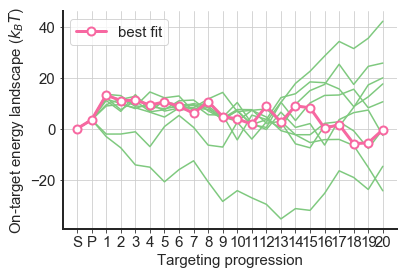

In [10]:
# --- (microscopic) free-energy landscape --- 
plt.figure()
Nparams=44
for filename in simset3:
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    parameters[0]=3.5 # if want to fix epsilon PAM
    Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(parameters,model_id,show_plot=False);
    plt.plot(np.array(Energy_landscape),color=sns.color_palette()[0])
lowest_chi_squared = np.array( landscape.loc[best_fit_conc3] )


plt.plot(np.array(lowest_chi_squared), color='#f768a1' , 
         marker='o', 
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='best fit');

LandscapeMED = landscape[landscape.columns[:]].median()
# plt.plot(np.array(LandscapeMED),color='black' , 
#          marker='o',
#          lw=3,
#          markersize =8,
#          markerfacecolor='white',
#          markeredgewidth= 2,
#          label='median');

plt.legend(fontsize=15,frameon=True)
plt.xlim(-1,22)
plt.xticks(list(range(0,22)),['S','P']+list(LandscapeMED.index[2:]),  fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Targeting progression',fontsize=15)
plt.ylabel('On-target energy landscape ($k_BT$)',fontsize=15)
plt.grid('on')
sns.despine();


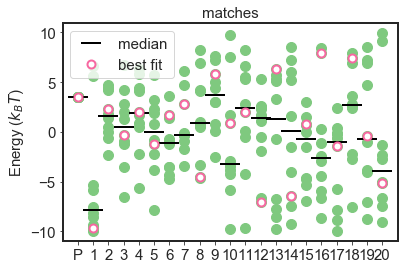

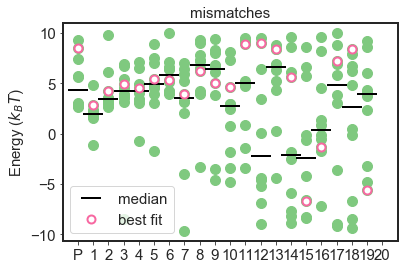

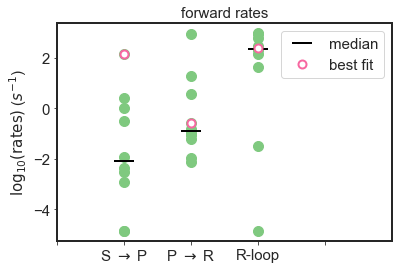

In [11]:
# ---- show fluctuations in parameter sets --- 
# THIS IS THE RESULT

# --- Matches ---
# MAYBE WE WANT TO NEGATE (multiply by -1 all the epsilonC to have the same sign convention as EpsilonPAM and EpsilonI)
plt.figure()
for sim in simset3:
    matches.loc[sim].plot(marker='o',markersize=10,linestyle='', color=sns.color_palette()[0], alpha=1.0,label='')

matches.median().plot(color='black',
            linestyle='',
             marker='_', 
             lw=4,
             markersize =20,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='median')    

matches.loc[best_fit_conc3].plot(color='#f768a1',
            linestyle='',
             marker='o', 
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='best fit')



plt.title('matches',fontsize=15)
plt.xticks(list(range(0,21)),['P']+list(range(1,21)),fontsize=15);
plt.xlim(-1,21);
plt.yticks(fontsize=15);
plt.ylabel('Energy ($k_BT$)',fontsize=15);
plt.legend(fontsize=15,frameon=True);

# --- Mismatches --- 
plt.figure()
for sim in simset3:
    mismatches.loc[sim].plot(marker='o',markersize=10,linestyle='', color=sns.color_palette()[0], alpha=1.0,label='')

mismatches.median().plot(color='black',
            linestyle='',
             marker='_', 
             lw=4,
             markersize =20,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='median')    
    

mismatches.loc[best_fit_conc3].plot(color='#f768a1',
            linestyle='',
             marker='o', 
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='best fit')



plt.title('mismatches',fontsize=15)
plt.xticks(list(range(0,21)),['P']+list(range(1,21)),fontsize=15);
plt.xlim(-1,21);
plt.yticks(fontsize=15);
plt.ylabel('Energy ($k_BT$)',fontsize=15);
plt.legend(fontsize=15,frameon=True);


# --- 10log of the forward rates --- 
plt.figure()
for sim in simset3:
    forward_rates.loc[sim].apply(np.log10).plot(marker='o',markersize=10,linestyle='', color=sns.color_palette()[0], alpha=1.0,label='')

forward_rates.median().apply(np.log10).plot(color='black',
            linestyle='',
             marker='_', 
             lw=4,
             markersize =20,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='median')    
    
    

forward_rates.loc[best_fit_conc3].apply(np.log10).plot(color='#f768a1',
            linestyle='',
             marker='o', 
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='best fit')



plt.title('forward rates',fontsize=15)
plt.xticks(range(-1,4),['',r'S $\rightarrow$ P',r'P $\rightarrow$ R','R-loop',''],fontsize=15);
plt.xlim(-1,4);
plt.yticks(fontsize=15);
plt.ylabel(r'$\log_{10}(\rm{rates})$ ($s^{-1}$)',fontsize=15);
plt.legend(fontsize=15,frameon=True);




In [31]:
time_conc2=(((37+40+40+38+35+26)*60+8+56+14+46+56+31)/(60*6))
# Can't find the other files with the time in it
time_conc3=((29*60+13+25*60+56+17+60+7+21*60+26+33*60+2+
            32*60+31+29*60+24+26*60+52+23*60+48+15*60+42)/(60*10))
print('The avarage fit-time needed for conc2 is: ', time_conc2)
print('The avarage fit-time needed for conc3 is: ', time_conc3)

The avarage fit-time needed for conc2 is:  36.58611111111111
The avarage fit-time needed for conc3 is:  23.93
